<a href="https://colab.research.google.com/github/ignaciomontovio/TP-Virus/blob/Nacho/TP_EntregableVirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Práctico

#### 01-3900 | Ciencia de datos | 2024

Alumno:

## Enunciado

Se tienen un dataset con datos de pacientes internados en un hospital (TP_Virus_Alumnos.csv). La clase de interes (1) refiere a la presencia de un virus. El virus tiene normalmente una gravedad leve/baja y el tratamiento suele ser invasivo. Datos como nombre y apellido han sido eliminados y los valores tanto en sangre (BLD), hormonales u otros análisis sobre reactivos han sido alterados en sus valores para preservar la privacidad. Se aclara que no se ha modificado su capacidad predictiva (Si es que la tienen).


Para su conocimiento: </BR>
Datos generales de Edad, Peso, Altura y condición laboral (Activo, Pasivo etc).
Datos medidos en hospital:</BR>
BLD: Sangre</BR>
LVL: Hormonales</BR>
REC: Otros análisis</BR>

Se pide obtener con los datos disponibles el mejor modelo posible que prediga la presencia o ausencia del virus.
Dado que el tratamiento es invasivo y la grevedad es moderada se requiere "atrapar" tantos "1" como sea posible y minimizar los falsos positivos para evitar que reciban un tratamiento de estas caracteristicas personas que no presentan el virus. Intente obtener el mejor modelo que maximice la métrica que considere correspondiente.



## Como desarrollar el exámen

A partir del dataset realice todas las acciones para poder llegar al mejor modelo, explique brevemente en los fundamentos de sus transformaciones o acciones en general.

La nota derivará de: </BR>
1.La calidad de la clasificación realizada</BR>
2.La fundamentación de los pasos realizados</BR>
3.Lo sencillo de llevar a producción el desarrollo</BR>



Los docentes evaluaran su clasificador utilizando un conjunto de datos del dataset "fuera de la caja" (out of the box, al que usted no tiene acceso). Para minimizar la posible diferencia entre su medición y la medición del docente recuerde y aplique conceptos de test, validación cruzada y evite los errores comunes de sesgo de selección y fuga de datos (PPT/Pdf Árboles de clasificación) o  Sklearn "10. Common pitfalls and recommended practices" disponible en "https://scikit-learn.org/stable/common_pitfalls.html"   

Al final del notebook encontrará un bloque de código que lee la muestra adicional (a la que usted no tiene acceso) si PRODUCCION==True, en caso contrario solo lee una submuestra del conjunto original para validar que el código funciona. Desarrolle el notebook como considere, para finalmente asignar el mejor clasificador que usted haya obtenido remplazando en f_clf = None, None por su clasificador. Implemente todas las transformaciones entre esa línea y la predición final (Evitando al fuga de datos). Ver TP_AutomatizarTransformaciones.ipynb

En materiales del MIEL se adjunta un notebook que propone algunas ideas para automatizar el proceso.

## Evaluacion final - Docente + Alumno

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder


PRODUCCION = False
best_clf = None #Asignar aqui el mejor clasificador posible (previamente entrenado)

#Leemos el dataset de evaluación, simulando producción
if PRODUCCION==False:
    df = pd.read_csv("TP_Virus_Alumnos.csv")
    # df_orig = df
    # _, df = train_test_split(df, test_size=0.3, random_state=42)
else:
    df = pd.read_csv("TP_Virus_Evaluacion.csv")
#Dividimos en target y predictoras

X_prod = df.drop("target", axis=1)
y_prod = df["target"]

#Transformaciones


#Evaluación final
#y_pred = best_clf.predict(X_prod)
#print(classification_report(y_prod, y_pred))
# df.shape[0]

## Analisis de Variables

In [ ]:
# verificamos los tipos de datos
df.dtypes

In [ ]:
# Verificamos si hay valores nulos para imputar
df.isnull().sum()

### Correlacion

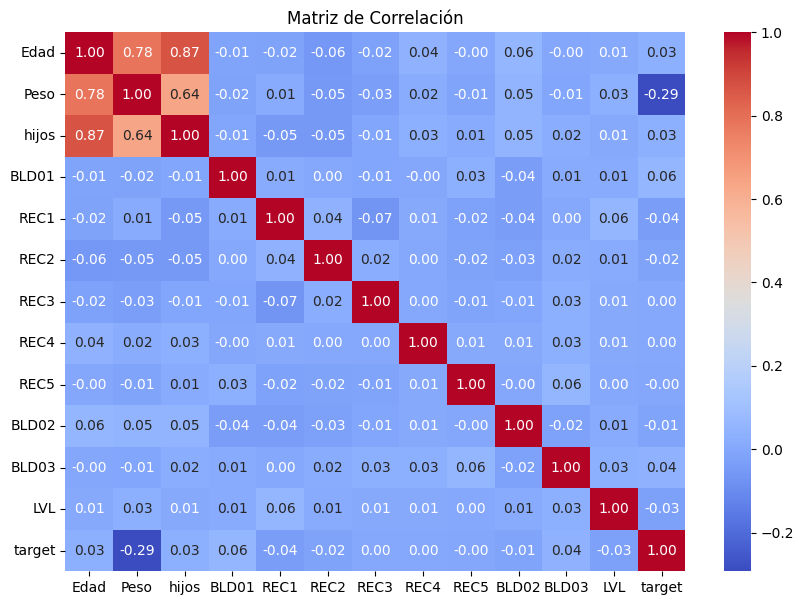

In [ ]:
#En la matriz de correlación vemos que edad, peso e hijos estan ampliamente correlacionados.
#Las demas variables no poseen correlacion entre ellas, pueden aportar valor.
fig, ax = plt.subplots(figsize=(10,7))
mat = df.select_dtypes(include=['int', 'float']).corr()
sns.heatmap(mat, annot=True, cmap='coolwarm', fmt=".2f",  ax=ax)
plt.title('Matriz de Correlación')
plt.show()

### Edad

In [ ]:
# Analisis de la distribución de la variable target "Edad"
print( df.Edad.value_counts() )
sns.countplot(x='Edad', data=df, hue='target', legend=False)

In [ ]:
df[["Edad"]].boxplot()
df[["Edad"]].hist()

In [ ]:
df[["Edad"]].describe().T

In [ ]:
df.Edad.value_counts()

### Peso

In [ ]:
df[["Peso"]].boxplot()
df[["Peso"]].hist()

In [ ]:
df[["Peso"]].describe().T

In [ ]:
df.Peso.value_counts()

# Observamos outliers en peso. Los valores atipicos estan relacionados con los recien nacidos, debido a la media del peso de la muestra,
# parece ser un valor fuera de lo normal cuando no lo es. Sin embargo que el peso '8.934178..'
# sea el único que encuentre repetido varias veces es indicativo de un error en la carga o defectos en la muestra.

### Hijos

In [ ]:
# Analisis de la distribución de la variable target "hijos"
print( df.hijos.value_counts() )
sns.countplot(x='hijos', data=df, hue='hijos', legend=False)

df[["hijos"]].boxplot()
df[["hijos"]].hist()

In [ ]:
df[["hijos"]].describe().T

In [ ]:
df.hijos.value_counts()

### BLD01

In [ ]:
df[["BLD01"]].boxplot()
df[["BLD01"]].hist(bins=30)

In [ ]:
df[["BLD01"]].describe().T

In [ ]:
df.BLD01.value_counts()

### BLD02

array([[<Axes: title={'center': 'BLD02'}>]], dtype=object)

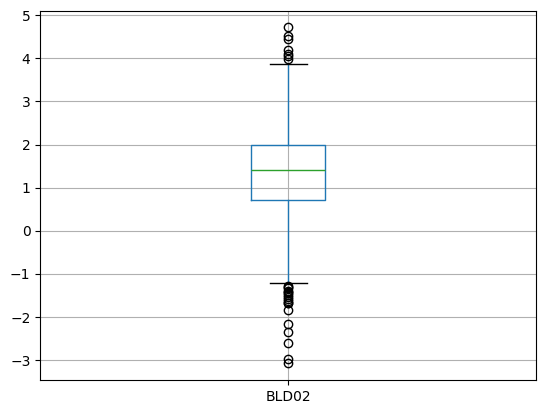

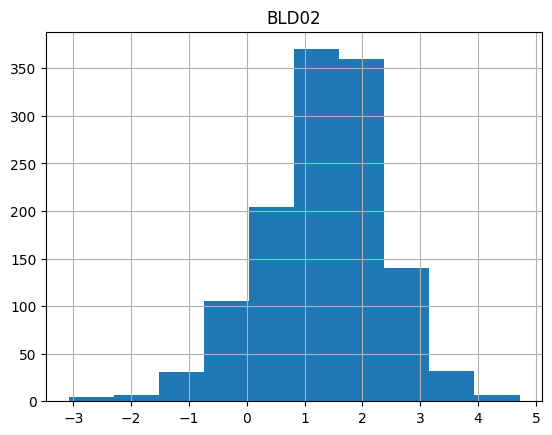

In [3]:
df[["BLD02"]].boxplot()
df[["BLD02"]].hist()

In [ ]:
df[["BLD02"]].describe().T

In [ ]:
print(df.BLD02.value_counts())

### BLD03

In [ ]:
df[["BLD03"]].boxplot()
df[["BLD03"]].hist()

In [ ]:
df[["BLD03"]].describe().T

In [ ]:
df.BLD03.value_counts()

### REC1

In [ ]:
df[["REC1"]].boxplot()
df[["REC1"]].hist()

In [ ]:
df[["REC1"]].describe().T

In [ ]:
df.REC1.value_counts()

### REC2

In [ ]:
df[["REC2"]].boxplot()
df[["REC2"]].hist()

In [ ]:
df[["REC2"]].describe().T

In [ ]:
df.REC2.value_counts()

### REC3

In [ ]:
df[["REC3"]].boxplot()
df[["REC3"]].hist()

In [ ]:
df[["REC3"]].describe().T

In [ ]:
df.REC3.value_counts()

### REC4

In [ ]:
df[["REC4"]].boxplot()
df[["REC4"]].hist()

In [ ]:
df[["REC4"]].describe().T

In [ ]:
df.REC4.value_counts()

### REC5

In [ ]:
df[["REC5"]].boxplot()
df[["REC5"]].hist()

In [ ]:
df[["REC5"]].describe().T

In [ ]:
df.REC5.value_counts()

### Conclusiones y preguntas

Las variables BLD01, BLD02, BLD03, REC1, REC2, REC3, REC4 y REC5, tienen outliers casi en ambos extremos, dice en el enunciado que estas variables fueron alteradas en sus valores para preservar la privacidad de las personas. Quizas eso afecto su distribución?
Estoy dudando si eliminarlas o tratarlas porque las variables Peso y LVL tambien muestran outliers pero en sus limites inferiores. Que se explica con que la muestra contiene recien nacidos y personas muy jovenes, por lo que no creo que se necesite tratarlas.

In [ ]:
#No hay duplicados.
print("Cantidad:",  df.duplicated().sum())

## Tratamiento de variables

Aca vamos a tratar cosas generales que queremos aplicar siempre, luego en la evaluacion del modelo,
con los pipelines probamos y analiamos distintas estragias de imputacion, normalizacion, etc...

In [ ]:
#Elimino los nulos en LVL
df_normalize = df_normalize.dropna(subset=['LVL'])
df_normalize = df_normalize.dropna(subset=['Edad'])

In [ ]:
def preparacion_de_datos(df_input, target, escalar_valores=False):
  df = df_input
  if escalar_valores:
    scaler_X = StandardScaler(with_mean=True, with_std=True)
    scaler_X.fit(df.drop(target,axis=1))
    x = pd.DataFrame(scaler_X.transform(df.drop(target,axis=1),), columns = df.drop(target,axis=1).columns )
  else:
    x = df.drop(target,axis=1)
  y = df[target]
  return x,y

In [ ]:
X_virus, y_virus = preparacion_de_datos( df_normalize, "target" ,escalar_valores=False)

In [4]:
# Hacemos el Split 70-30 para train-test
X_train, X_test, y_train, y_test = train_test_split(X_virus, y_virus,
                                                    test_size=0.3, stratify = y_virus, random_state=0)

NameError: name 'X_virus' is not defined

## Utilidades - Imputacion

In [6]:
def graficarCurvaRoc( y_pred, model ):
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
  auc = metrics.roc_auc_score(y_test, y_pred)
  # Graficamos
  plt.plot(fpr,tpr,label= model +" AUC="+str(round(auc,4))) #,label= "AUC="+str(auc))
  plt.legend(loc=4, fontsize=12)
  return auc

In [7]:
# Para automatizar la imputacion y hacerlo mas rapido y simple
# Nos va a servir para probar rapido distintas strategias de imputacion, encoding, normalizacion
# Y ver cual es la mejor.

class ColImputer(BaseEstimator, TransformerMixin):
    def __init__(self, imputer=SimpleImputer(), columns=[]):
        super().__init__()
        self.imputer = imputer
        self.columns = columns

    def fit(self, X, y=None):
        self.imputer.fit(X[self.columns])
        return self

    def get_feature_names_out(self):
        return self.imputer.get_feature_names_out()

    def  transform(self, X):
        Xc = X.copy()
        Xc.loc[:, self.columns] = self.imputer.transform(Xc[self.columns])
        return Xc

class ColEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoder=None, columns=[]):
        super().__init__()
        self.encoder = encoder
        self.columns = columns

    def fit(self, X, y=None):
        self.encoder.fit(X[self.columns])
        return self

    def get_feature_names_out(self):
        return self.get_feature_names_out()

    def  transform(self, X):
        Xc = X.copy()
        Xc.loc[:, self.columns] = self.encoder.transform(Xc[self.columns])
        return Xc

class ColScaler(BaseEstimator, TransformerMixin):
    def __init__(self, scaler=StandardScaler(), columns=[]):
        super().__init__()
        self.scaler = scaler
        self.columns = columns

    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns])
        return self

    def get_feature_names_out(self):
        return self.scaler.get_feature_names_out()

    def  transform(self, X):
        Xc = X.copy()
        Xc.loc[:, self.columns] = self.scaler.transform(Xc[self.columns])
        return Xc

class ColDummy(BaseEstimator, TransformerMixin):
    def __init__(self, columns=[], delete = ''):
        super().__init__()
        self.columns = columns
        self.delete = delete

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        Xc = X.copy()
        Xc = pd.get_dummies(Xc, columns=self.columns)
        if(self.delete != ''):
          Xc = Xc.drop(columns=self.delete)
        #Xc = X.drop(columns=self.columns)
        return Xc

class ReplaceValue(BaseEstimator, TransformerMixin):
    def __init__(self, column, old_value, new_value):
        self.column = column
        self.old_value = old_value
        self.new_value = new_value

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        Xc = X.copy()
        Xc.loc[:, self.column] = Xc[self.column].replace(self.old_value, self.new_value)
        return Xc

### Ejemplos

In [8]:
# Ejemplo de como llamar los custom imputer solo

X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)

ci = ColImputer(imputer=SimpleImputer(strategy='mean'), columns=["LVL"])
ci.fit(X_train)
X_train = ci.transform(X_train)
X_test = ci.transform(X_test)


In [9]:
# Ejemplo como llamar varios imputers/scalers en un Pipeline
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)

In [10]:
# Ejemplo como llamar varios imputers/scalers en un Pipeline
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)


pl = Pipeline(steps=[
    ("ImpCol1Col2", ColImputer(imputer=SimpleImputer(strategy='mean'), columns=["LVL"])),
    ("OrdinalEncoder", ColEncoder(encoder=OrdinalEncoder(categories=[["Activo", "Inactivo","No_declara"]]), columns=["Laboral"])),
    ("scaler", ColScaler(scaler=MinMaxScaler(), columns=["BLD03"])),
])

pl.fit(X_train, y_train)
X_train_nuevo = pl.transform(X_train)
X_test_nuevo = pl.transform(X_test)


In [11]:
# Ejemplo como agregar y evaluar modelo
from sklearn.linear_model import LogisticRegression
pl.steps.append(("LR", LogisticRegression( max_iter=3000 )))
pl.fit(X_train_nuevo, y_train)
y_pred = pl.predict(X_test_nuevo)
print(classification_report(y_test, y_pred))

# ESTO ULTIMO NO ME ANDA PREGUNTALE AL PROFE
# https://stackoverflow.com/questions/54836051/pipeline-ordinalencoder-valueerror-found-unknown-categories

ValueError: Found unknown categories [0.0, 1.0, 2.0] in column 0 during fit

## Evaluacion de modelos

In [12]:
df_norm = df
df_norm.loc[df['LVL'] == 1000000, 'LVL'] = None

#df_norm = df_norm[df_norm['Edad'] > 10]
#df_norm = df_norm[df_norm['Peso'] != 8.934178194834107]

#df_norm = df_norm.drop(columns=['edad'])

# Reemplazar los valores NaN por 'Desconocido' en Genero
df_norm["Genero"].fillna('Desconocido', inplace=True)


# Reemplazar los valores NaN por 'Desconocido' en Edad
#df_norm["Edad"].fillna('Desconocido', inplace=True)

X = df_norm.drop("target", axis=1)
y = df_norm["target"]

X_train_norm, X_test_norm, y_train, y_test = train_test_split(X, y, random_state=3, test_size=0.3)


pl = Pipeline(steps=[
    ("LVLImputer", ColImputer(imputer=SimpleImputer(strategy='mean'), columns=["LVL"])),
    ("EdadImputer", ColImputer(imputer=SimpleImputer(strategy='mean'), columns=["Edad"])),
    ("LaboralDummies", ColDummy(columns=["Laboral"])),
    ("GeneroDummies", ColDummy(columns=["Genero"], delete='Genero_Desconocido')),
    ("BLD03Scaler", ColScaler(scaler=MinMaxScaler(), columns=["BLD03"])),
    ("BLD02Scaler", ColScaler(scaler=MinMaxScaler(), columns=["BLD02"])),
    ("BLD01Scaler", ColScaler(scaler=MinMaxScaler(), columns=["BLD01"])),
    ("LVLScaler", ColScaler(scaler=MinMaxScaler(), columns=["LVL"]))
])

pl.fit(X_train_norm, y_train)
X_train = pl.transform(X_train_norm)
X_test = pl.transform(X_test_norm)

X_train

C:\Users\lauti\AppData\Local\Temp\ipykernel_17448\1331328872.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_norm["Genero"].fillna('Desconocido', inplace=True)


,Edad,Peso,hijos,BLD01,REC1,REC2,REC3,REC4,REC5,BLD02,BLD03,LVL,Laboral_Activo,Laboral_Inactivo,Laboral_No_declara,Genero_Femenino,Genero_Masculino,Genero_Otro
1986,78.000000,72.600345,4,0.614483,3.468938,62.609159,76.021275,16.275252,90.395843,0.391567,0.464291,0.673773,False,True,False,False,False,False
1336,53.000000,94.971318,3,0.561545,2.230155,63.404080,73.674660,14.650368,89.959414,0.346058,0.479559,0.616309,True,False,False,False,True,False
3598,57.000000,86.026963,4,0.427883,2.707016,64.399701,71.973841,14.437753,88.508567,0.675674,0.526144,0.616309,True,False,False,False,False,False
1167,7.000000,26.314939,0,0.419444,4.865281,63.893524,72.180738,15.208022,90.171442,0.336417,0.512086,0.264251,False,True,False,False,True,False
3088,38.176845,119.837058,0,0.639159,3.654325,63.690704,73.190857,14.001693,91.010797,0.694506,0.582330,0.616309,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,33.000000,89.263552,2,0.479692,4.861519,62.723841,72.990709,15.699700,88.944602,0.513376,0.408874,0.616309,True,False,False,False,True,False
968,30.000000,74.282078,2,0.528881,4.181098,62.936434,74.113698,16.940356,90.913767,0.635714,0.544144,0.656043,True,False,False,False,False,False
1667,51.000000,91.684094,4,0.532400,4.542602,63.700422,73.861100,15.546783,89.154361,0.238200,0.215020,0.616309,False,False,True,False,False,False
3321,78.000000,80.601930,3,0.556618,4.757968,63.495781,73.130045,15.907796,88.565129,0.413844,0.601292,0.636658,False,True,False,False,True,False


### Armado de modelos y obtencion de precision

In [13]:
logreg = LogisticRegression( max_iter=3000 )
logreg.fit(X_train, y_train)
y_pred_lg = logreg.predict(X_test)

treeclf = DecisionTreeClassifier(max_depth=10, random_state=1)
treeclf.fit(X_train, y_train)
y_pred_tc = treeclf.predict(X_test)

bayes_multi = MultinomialNB()
bayes_multi.fit(X_train, y_train)
y_pred_nb = bayes_multi.predict(X_test)

bayes_gauss = GaussianNB()
bayes_gauss.fit(X_train, y_train)
y_pred_gauss = bayes_gauss.predict(X_test)

knn = DecisionTreeClassifier(max_depth=10, random_state=1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

logreg_s = LogisticRegression(max_iter=1000)
logreg_s.fit(X_train, y_train)
y_pred_lg_s = logreg_s.predict(X_test)

bayes_gauss_s = GaussianNB()
bayes_gauss_s.fit(X_train, y_train)
y_pred_gauss_s = bayes_gauss_s.predict(X_test)

knn_s = DecisionTreeClassifier(max_depth=10, random_state=1)
knn_s.fit(X_train, y_train)
y_pred_knn_s = knn_s.predict(X_test)

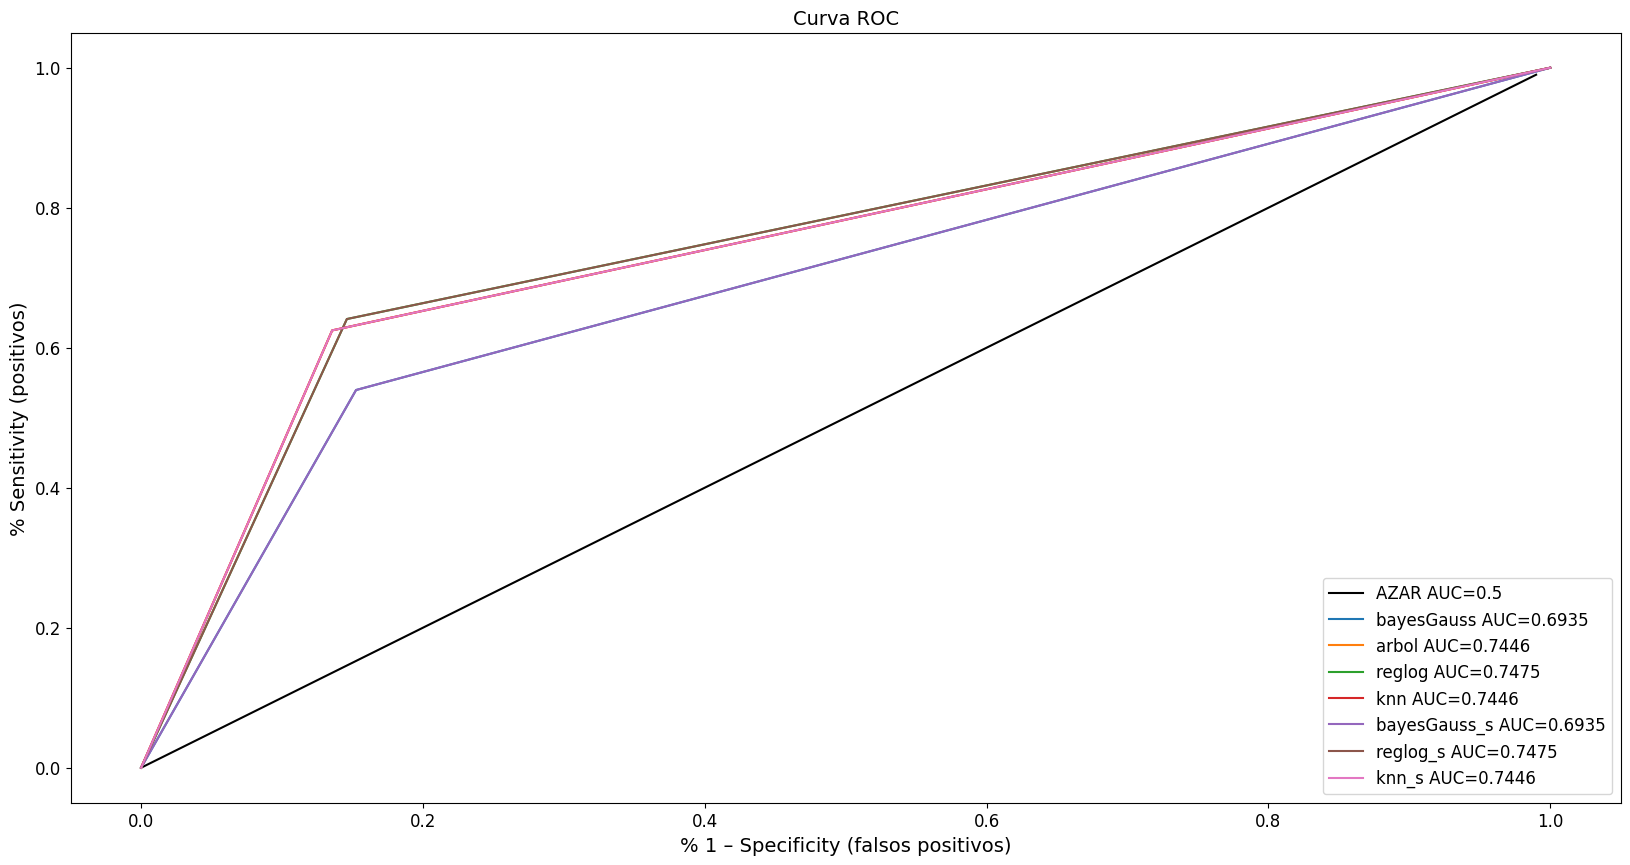

In [14]:
# Inicializamos los labels del gráfico
plt.figure(figsize=(20, 10))
plt.xlabel('% 1 – Specificity (falsos positivos)', fontsize=14)
plt.ylabel('% Sensitivity (positivos)', fontsize=14)

# Graficamos la recta del azar
it = [i/100 for i in range(100)]
plt.plot(it,it,label="AZAR AUC=0.5",color="black")
#'bayesMulti':y_pred_nb,
modelos = { 'bayesGauss':y_pred_gauss,'arbol':y_pred_tc,
           'reglog':y_pred_lg,'knn':y_pred_knn, 'bayesGauss_s':y_pred_gauss_s,
           'reglog_s':y_pred_lg_s,'knn_s':y_pred_knn_s,
           }
areas = []
for pred in modelos:
    auc = graficarCurvaRoc( modelos[pred] , pred )
    areas.append( (pred, auc) )
areas = pd.DataFrame(areas, columns=['model','auc'])
# Agregamos el titulo y configuro el tamaño de letra
plt.title("Curva ROC", fontsize=14)
plt.tick_params(labelsize=12);
plt.show()

### Clasificacion de todos los modelos.
Debo mejorar el recall.

In [15]:
from IPython.display import display, Markdown

display(Markdown(f"## y_pred_lg"))
print(classification_report(y_test, y_pred_lg))

display(Markdown(f"## y_pred_tc"))
print(classification_report(y_test, y_pred_tc))

display(Markdown(f"## y_pred_nb"))
print(classification_report(y_test, y_pred_nb))

display(Markdown(f"## y_pred_gauss"))
print(classification_report(y_test, y_pred_gauss))

display(Markdown(f"## y_pred_knn"))
print(classification_report(y_test, y_pred_knn))

display(Markdown(f"## y_pred_lg_s"))
print(classification_report(y_test, y_pred_lg_s))

display(Markdown(f"## y_pred_gauss_s"))
print(classification_report(y_test, y_pred_gauss_s))

display(Markdown(f"## y_pred_knn_s"))
print(classification_report(y_test, y_pred_knn_s))

## y_pred_lg

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       767
           1       0.74      0.64      0.69       493

    accuracy                           0.77      1260
   macro avg       0.76      0.75      0.75      1260
weighted avg       0.77      0.77      0.77      1260



## y_pred_tc

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       767
           1       0.75      0.62      0.68       493

    accuracy                           0.77      1260
   macro avg       0.76      0.74      0.75      1260
weighted avg       0.77      0.77      0.77      1260



## y_pred_nb

              precision    recall  f1-score   support

           0       0.71      0.81      0.75       767
           1       0.62      0.49      0.54       493

    accuracy                           0.68      1260
   macro avg       0.66      0.65      0.65      1260
weighted avg       0.67      0.68      0.67      1260



## y_pred_gauss

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       767
           1       0.69      0.54      0.61       493

    accuracy                           0.73      1260
   macro avg       0.72      0.69      0.70      1260
weighted avg       0.72      0.73      0.72      1260



## y_pred_knn

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       767
           1       0.75      0.62      0.68       493

    accuracy                           0.77      1260
   macro avg       0.76      0.74      0.75      1260
weighted avg       0.77      0.77      0.77      1260



## y_pred_lg_s

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       767
           1       0.74      0.64      0.69       493

    accuracy                           0.77      1260
   macro avg       0.76      0.75      0.75      1260
weighted avg       0.77      0.77      0.77      1260



## y_pred_gauss_s

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       767
           1       0.69      0.54      0.61       493

    accuracy                           0.73      1260
   macro avg       0.72      0.69      0.70      1260
weighted avg       0.72      0.73      0.72      1260



## y_pred_knn_s

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       767
           1       0.75      0.62      0.68       493

    accuracy                           0.77      1260
   macro avg       0.76      0.74      0.75      1260
weighted avg       0.77      0.77      0.77      1260

